In [46]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
def extract_exp(sp_cd):
    sub1 = "\r"
    sub2 = "Years"
    idx1 = sp_cd.index(sub1)
    idx2 = sp_cd.index(sub2)
    # print(idx1)
    # print(sp_cd[idx1])
    res = ''
    # getting elements in between
    for idx in range(idx1 + len(sub1) + 1, idx2):
        res = res + sp_cd[idx]
    
    # printing result
    # print("The extracted string : " + res)
    # print(res, len(res))
    return int(float(res))

In [48]:
docs = ['ayurveda', 'cardiologist', 'dentist', 'dermatologist', 'ent', 'gastroentreologist', 'gyanecologist-obstetrecian', 'homoeopath', 'implantologist', 'neurologist', 'ophthalmologist', 'pediatric-dentist', 'urologist']

In [49]:
ayurveda_data = pd.read_csv("../Data_final/ayurveda_new.csv", converters={'feedbacks': literal_eval})
cardiologist_data = pd.read_csv("../Data_final/cardiologist_new.csv", converters={'feedbacks': literal_eval})
dentist_data = pd.read_csv("../Data_final/dentist_new.csv", converters={'feedbacks': literal_eval})
dermatologist_data = pd.read_csv("../Data_final/dermatologist_new.csv", converters={'feedbacks': literal_eval})
ent_data = pd.read_csv("../Data_final/ent_new.csv", converters={'feedbacks': literal_eval})
gastroentreologist_data = pd.read_csv("../Data_final/gastroenterologist_new.csv", converters={'feedbacks': literal_eval})
gyanecologist_obstetrecian_data = pd.read_csv("../Data_final/gynecologist-obstetrician_new.csv", converters={'feedbacks': literal_eval})
homoeopath_data = pd.read_csv("../Data_final/homoeopath_new.csv", converters={'feedbacks': literal_eval})
implantologist_data = pd.read_csv("../Data_final/implantologist_new.csv", converters={'feedbacks': literal_eval})
neurologist_data = pd.read_csv("../Data_final/neurologist_new.csv", converters={'feedbacks': literal_eval})
ophthalmologist_data = pd.read_csv("../Data_final/ophthalmologist_new.csv", converters={'feedbacks': literal_eval})
pediatric_dentist_data = pd.read_csv("../Data_final/pediatric-dentist_new.csv", converters={'feedbacks': literal_eval})
urologist_data = pd.read_csv("../Data_final/urologist_new.csv", converters={'feedbacks': literal_eval})

In [67]:
ayurveda_data

,Unnamed: 0,name,qualification,specialization,clinic_address,timing_days,timing_session,review_score,current_url,feedbacks,experience,consultation_fee,Reviews scores index,Doctor review score index
0,0,Dr. Tanmaya,"BAMS, MD - Ayurveda Medicine","AYUSHAyurveda, Alternative Medicine\r\n14 Year...","206, 1st Cross, 1st Main, 60 Feet Road, AECS L...","Mon, Wed - Sun",11:00 AM - 02:30 PM\r\n04:00 PM - 07:30 PM,95% (168 votes),https://www.practo.com/bangalore/doctor/dr-tan...,[I recommend the doctorI was suffering with a ...,14,400,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1
1,1,Dr. Deepika,BAMS,AYUSHAyurveda\r\n13 Years Experience Overall,"#28, 5th Cross,35th Main Rd, BTM 2nd Stage, Be...",Wed - Thu,12:00 PM - 06:00 PM,98% (714 votes),https://www.practo.com/bangalore/doctor/dr-dee...,[Visited For DetoxificationI recommend the doc...,13,400,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]",1
2,2,Dr. Manasa Bhat,BAMS,"AYUSHAyurveda, Alternative Medicine\r\n11 Year...","45 / 13, Tumkur Road, Landmark: Near Sandal So...","Mon, Wed - Fri",10:00 AM - 12:30 PM,99% (119 votes),https://www.practo.com/bangalore/doctor/manasa...,[Visited For Pilonidal SinusI recommend the do...,11,300,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 1]",1
3,3,Dr. Phanindra V V,"MD - Ayurveda Medicine, BAMS","AYUSHAyurveda, Sexologist, Sexologist (Ayurved...","180, 9th Main Road, Srinagar, Landmark: Near H...",Mon - Sat,10:00 AM - 01:00 PM\r\n05:00 PM - 08:00 PM,99% (1111 votes),https://www.practo.com/bangalore/doctor/phanin...,[Visited For Piles Treatment (Non Surgical)I r...,14,400,"[1, 1, 0, 1, 1, 1, 1, 0, 1, 0]",1
5,5,Dr. Shiny Menon,BAMS,"AYUSHAyurveda, Alternative Medicine\r\n18 Year...","#119, 3rd cross, Prashant Layout, Whitefield B...","Mon, Wed - Sun",10:00 AM - 05:30 PM,98% (124 votes),https://www.practo.com/bangalore/doctor/dr-shi...,[I recommend the doctorHappy with: Doctor frie...,18,400,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]",1
6,6,Dr. Shree Lakshmi.N,BAMS,AYUSHAyurveda\r\n22 Years Experience Overall,"Number 290, 71, 38th Cross Rd, 8th Block, Jaya...","Mon - Tue, Thu - Sun",10:30 AM - 07:00 PM,100% (55 votes),https://www.practo.com/bangalore/doctor/shree-...,[Visited For TREATMENT FOR SINUSITISI recommen...,22,400,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1
7,7,Dr. Chaya,"BAMS, MSc - Psychology, PhD - Psychology","AYUSHAyurveda, Counselling Psychologist\r\n17 ...","# 94, 95, 3rd Cross Road, South Avenue Layout,...",Mon - Sun,10:00 AM - 01:00 PM\r\n02:00 PM - 07:00 PM,97% (261 votes),https://www.practo.com/bangalore/doctor/chaya-...,[Visited For PsoriasisI recommend the doctor“M...,17,1200,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 0]",1
8,8,Dr. Sharad Kulkarni,"BAMS, MS - Ayurveda","AYUSHAyurveda, Sexologist (Ayurveda)\r\n8 Year...","# 2B/1, First Floor, Someshwara Temple Street,...",Mon,10:00 AM - 10:40 AM\r\n05:00 PM - 06:00 PM,99% (780 votes),https://www.practo.com/bangalore/doctor/dr-sha...,[Visited For DetoxificationDigestion ProblemI ...,8,500,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1
9,9,Dr. Krishna Kumar,BAMS,AYUSHAyurveda\r\n14 Years Experience Overall,"#28, 5th Cross,35th Main Rd, BTM 2nd Stage, Be...",Mon,11:00 AM - 01:30 PM\r\n02:00 PM - 03:30 PM,97% (1730 votes),https://www.practo.com/bangalore/doctor/dr-kri...,[Visited For Infertility Evaluation / Treatmen...,14,400,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]",1
11,11,Dr. Vinay,BAMS,AYUSHAyurveda\r\n13 Years Experience Overall,"53, 5th Main, Bull Temple Road, NR Colony, Lan...",Mon - Sat,11:00 AM - 02:00 PM\r\n05:00 PM - 09:00 PM,99% (150 votes),https://www.practo.com/bangalore/doctor/dr-vin...,[Visited For TREATMENT FOR CERVICAL SPONDILITI...,13,300,"[1, 0, 1, 1, 0, 1, 1, 1, 1, 1]",1


In [50]:
ayurveda_data = ayurveda_data.dropna()
cardiologist_data = cardiologist_data.dropna()
dentist_data = dentist_data.dropna()
dermatologist_data = dermatologist_data.dropna()
ent_data = ent_data.dropna()
gastroentreologist_data = gastroentreologist_data.dropna()
gyanecologist_obstetrecian_data = gyanecologist_obstetrecian_data.dropna()
homoeopath_data = homoeopath_data.dropna()
implantologist_data = implantologist_data.dropna()
neurologist_data = neurologist_data.dropna()
ophthalmologist_data = ophthalmologist_data.dropna()
pediatric_dentist_data = pediatric_dentist_data.dropna()
urologist_data = urologist_data.dropna()

In [51]:
data = [ayurveda_data, cardiologist_data, dentist_data, dermatologist_data, ent_data, gastroentreologist_data, gyanecologist_obstetrecian_data, homoeopath_data, implantologist_data, neurologist_data, ophthalmologist_data, pediatric_dentist_data, urologist_data]

In [52]:
for d in data:
    
    exp_list = []
    specialization = d['specialization']
    for sp in specialization:
        # print(sp)
        exp_val = extract_exp(sp)
        exp_list.append(exp_val)
    
    d['experience'] = exp_list
    

In [53]:
for d in data:
    
    consultation_fee = d['consultation_fee']
    fees_list = []
    # print(consultation_fee)
    for cs_fee in consultation_fee:
        fee = int(cs_fee[1:])
        fees_list.append(fee)
    
    d.drop(['consultation_fee'], inplace=True, axis=1)
    d['consultation_fee'] = fees_list

Pearsons correlation b/w fees and exp: -0.001


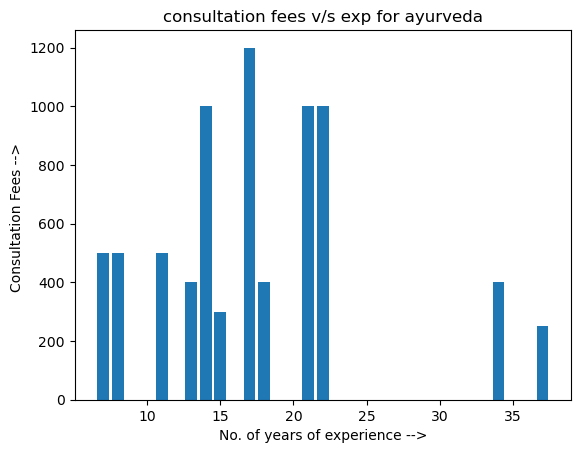

----------------------------
Pearsons correlation b/w fees and exp: 0.249


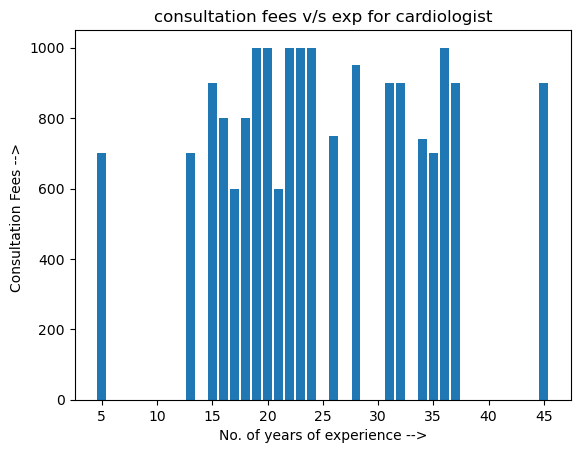

----------------------------
Pearsons correlation b/w fees and exp: -0.042


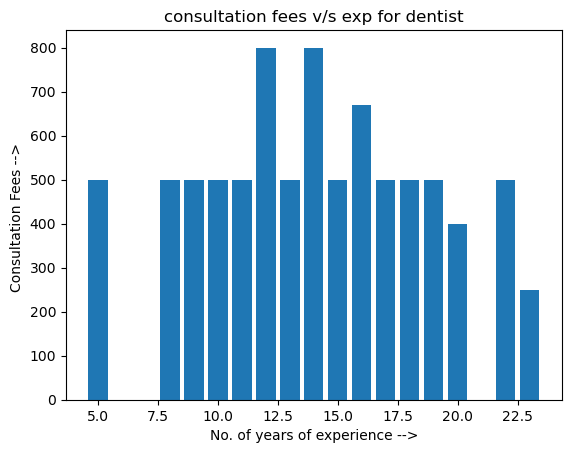

----------------------------
Pearsons correlation b/w fees and exp: 0.218


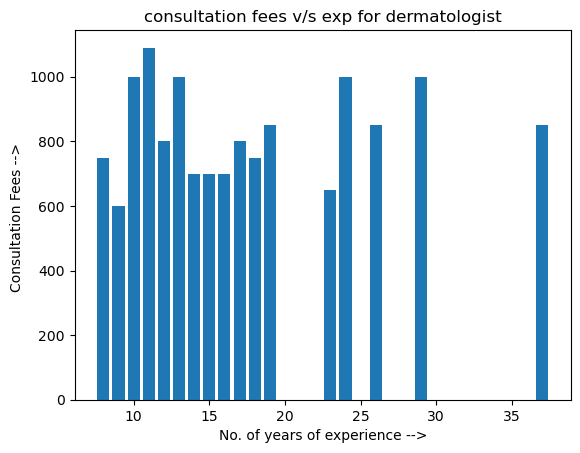

----------------------------
Pearsons correlation b/w fees and exp: 0.238


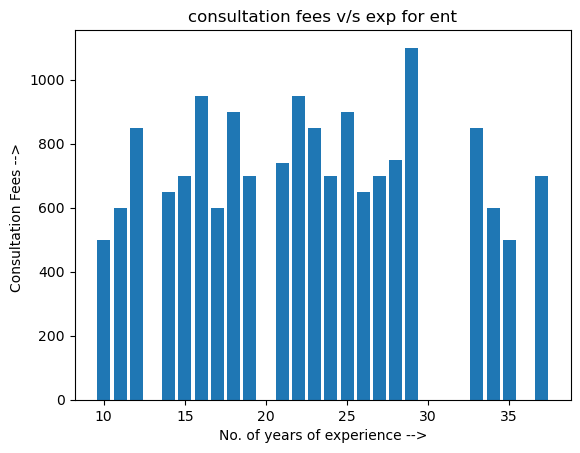

----------------------------
Pearsons correlation b/w fees and exp: 0.172


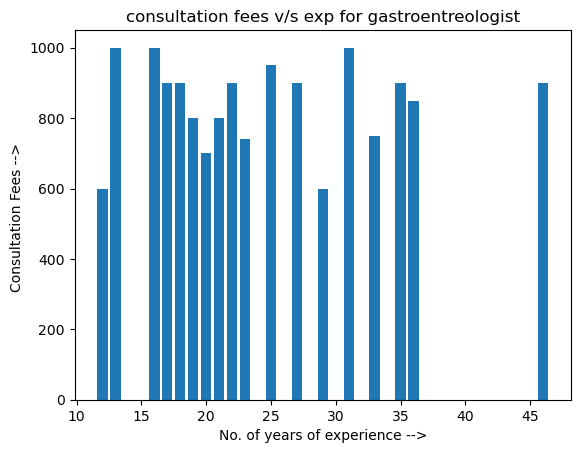

----------------------------
Pearsons correlation b/w fees and exp: 0.252


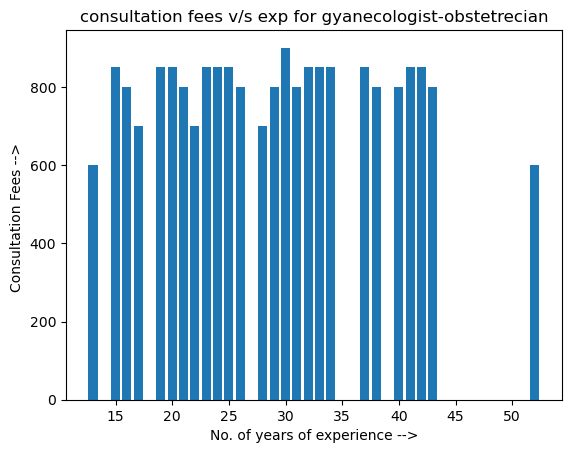

----------------------------
Pearsons correlation b/w fees and exp: 0.370


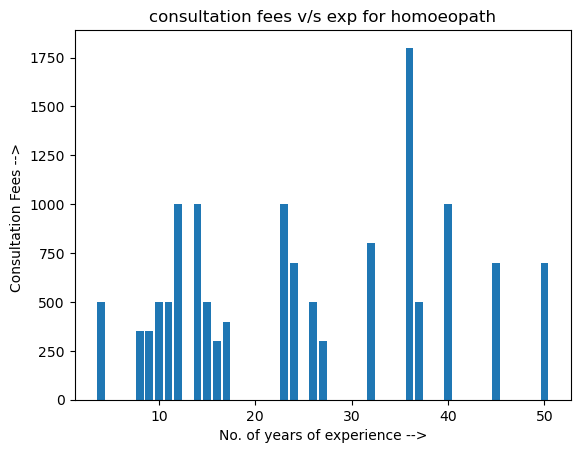

----------------------------
Pearsons correlation b/w fees and exp: 0.306


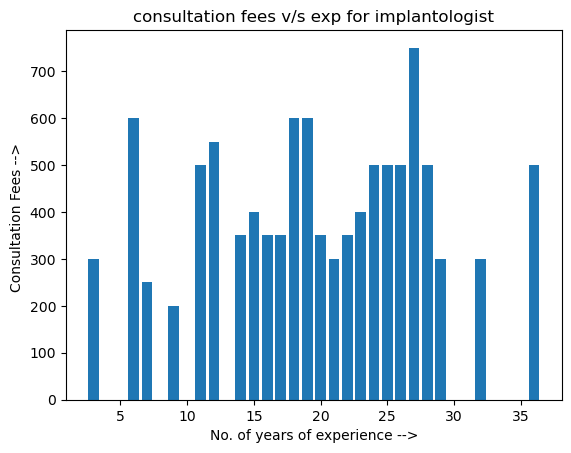

----------------------------
Pearsons correlation b/w fees and exp: 0.245


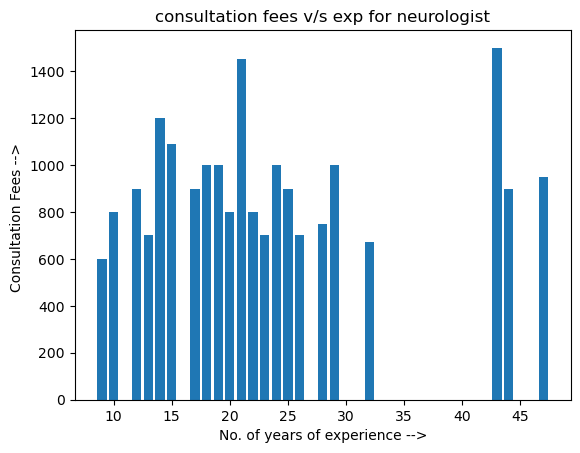

----------------------------
Pearsons correlation b/w fees and exp: 0.178


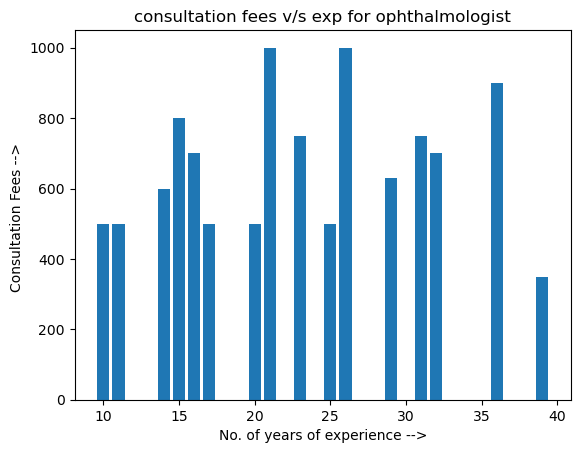

----------------------------
Pearsons correlation b/w fees and exp: -0.006


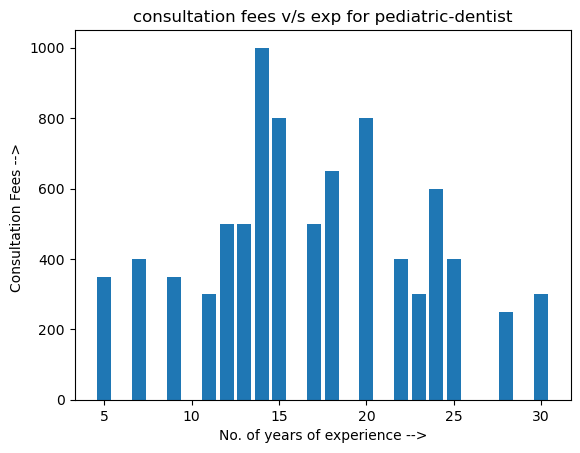

----------------------------
Pearsons correlation b/w fees and exp: 0.416


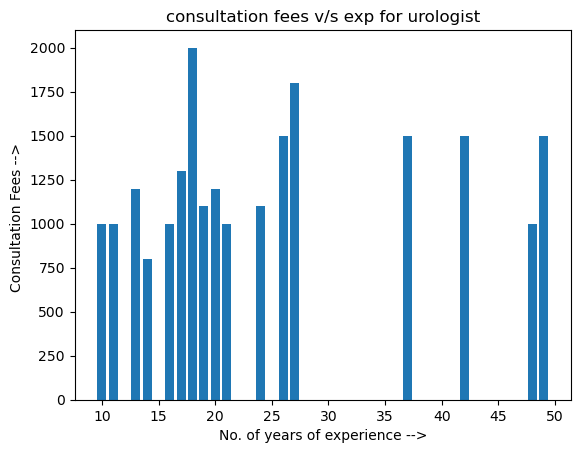

----------------------------


In [54]:
i = 0 
for d in data:
    
    fees = list(d['consultation_fee'])
    exp = list(d['experience'])
    
    corr, _ = pearsonr(fees, exp)
    print('Pearsons correlation b/w fees and exp: %.3f' % corr) 
    
    plt.bar(exp, fees) 
    plt.xlabel("No. of years of experience -->")
    plt.ylabel("Consultation Fees --> ")
    plt.title("consultation fees v/s exp for " +docs[i])
    i+=1
    plt.show()
    print("----------------------------")

In [55]:
max_consultation_fee_list = []
min_consultation_fee_list = []

for d in data:
    
    consultation_fee = d['consultation_fee']
    max_fee = np.max(consultation_fee)
    min_fee = np.min(consultation_fee)
    max_consultation_fee_list.append(max_fee)
    min_consultation_fee_list.append(min_fee)


Text(0.5, 1.0, 'Max-Consultation Fees v/s Specialities')

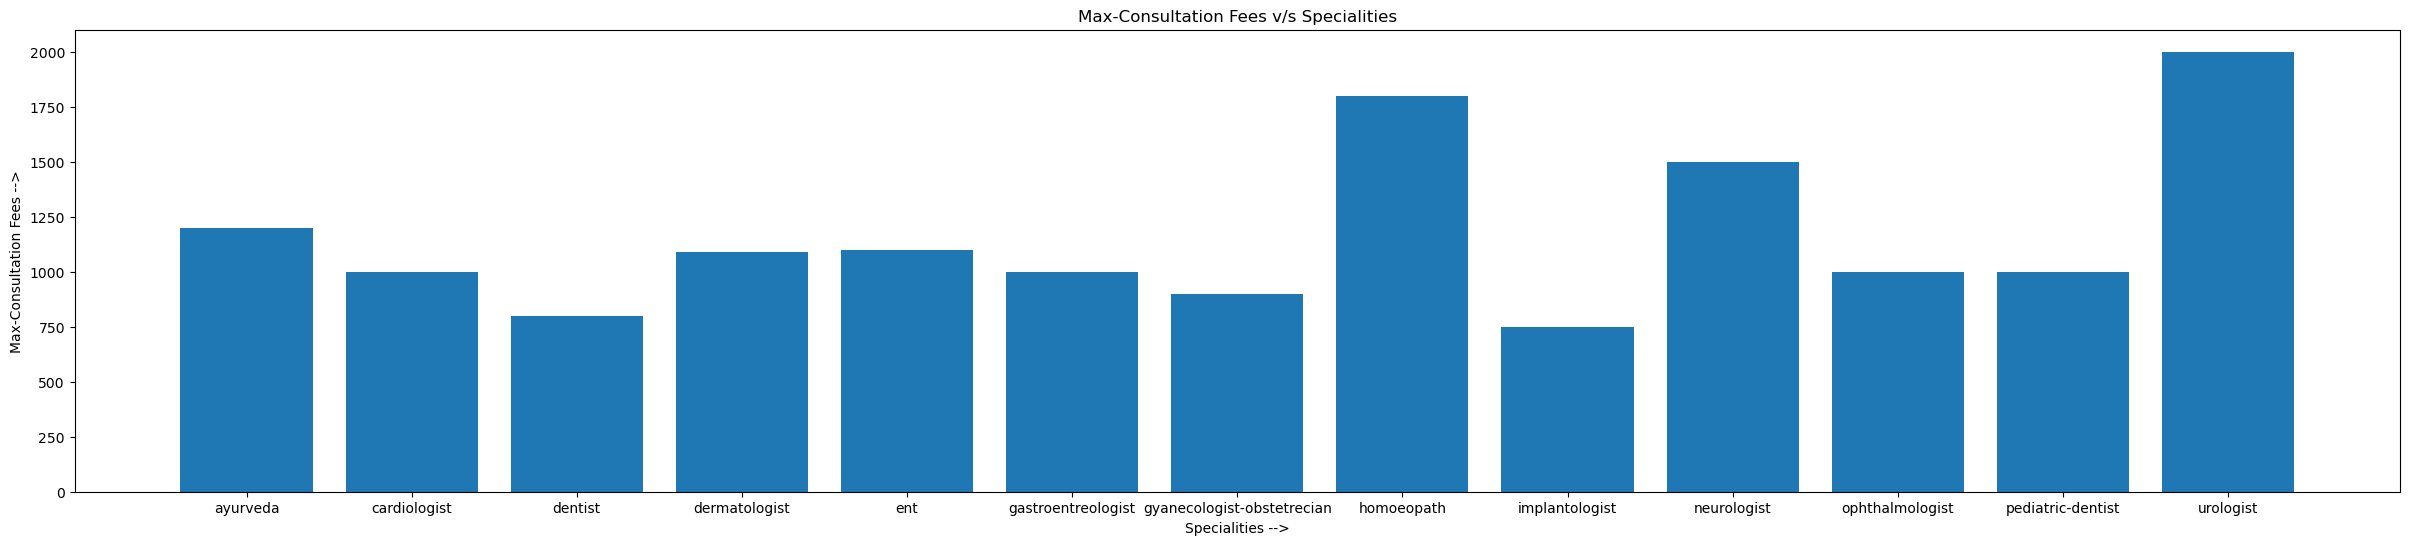

In [56]:
plt.figure(figsize=(30,6))
plt.bar(docs, max_consultation_fee_list)
plt.xlabel("Specialities -->")
plt.ylabel("Max-Consultation Fees -->")
plt.title("Max-Consultation Fees v/s Specialities")

Text(0.5, 1.0, 'Min-Consultation Fees v/s Specialities')

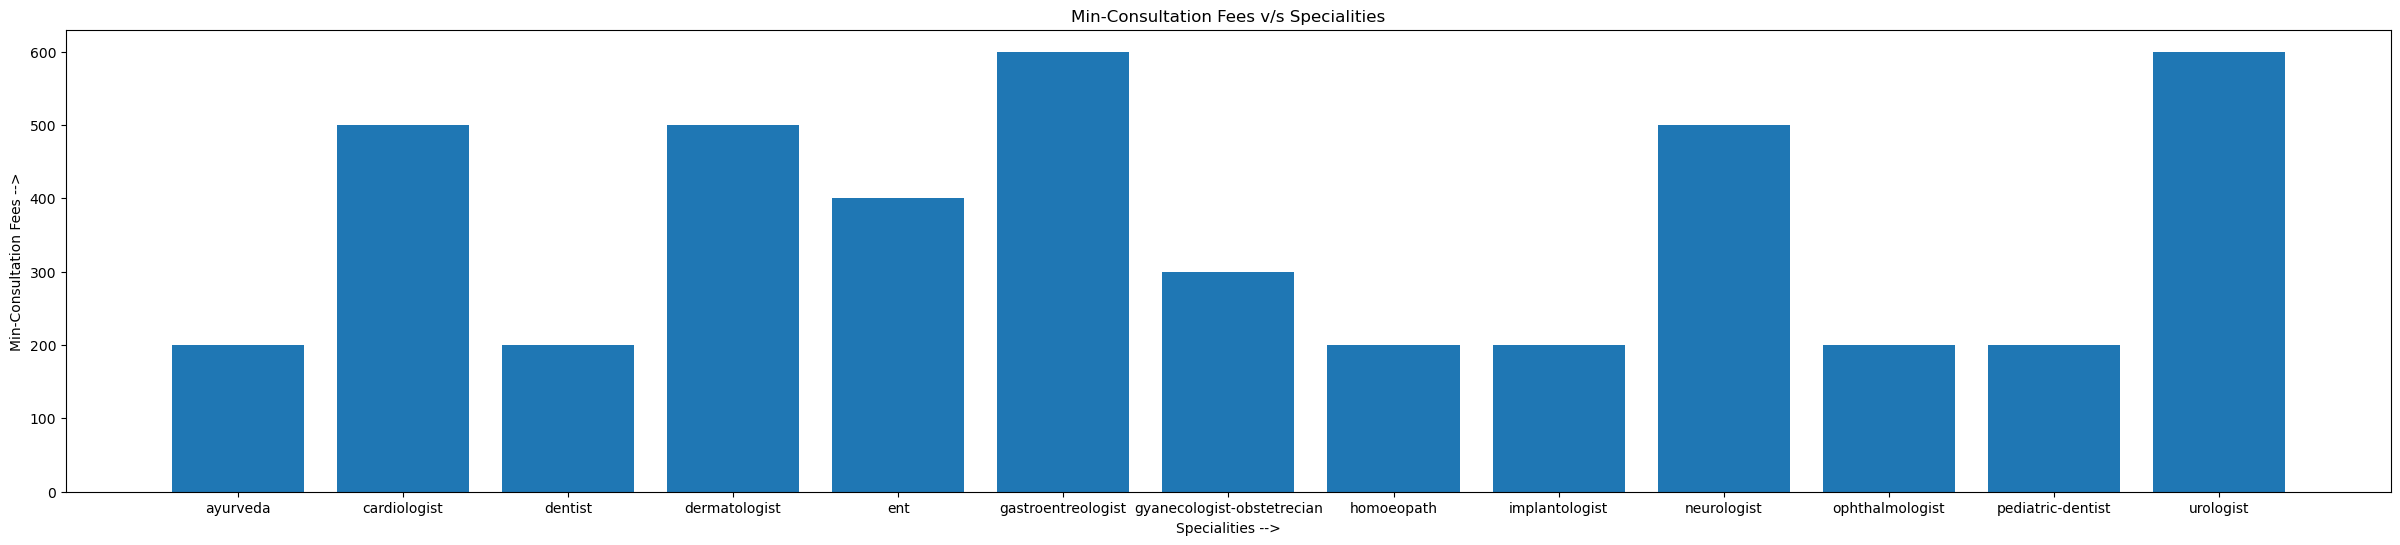

In [57]:
plt.figure(figsize=(30,6))
plt.bar(docs, min_consultation_fee_list)
plt.xlabel("Specialities -->")
plt.ylabel("Min-Consultation Fees -->")
plt.title("Min-Consultation Fees v/s Specialities")

In [66]:
for d in data:
    
    feedbacks = d["feedbacks"]
    
    overall_score_index_doc_list = []
    overall_reviews_score_index_list = []
    for reviews in feedbacks:
        scores_index_list = []
        for review in reviews:
            sid = SentimentIntensityAnalyzer()
            scores_dict = sid.polarity_scores(review)
            print(scores_dict)
            scores = [scores_dict['neg'], scores_dict['pos']]
            print(scores)
            # break
            score_index = scores.index(max(scores))
            scores_index_list.append(score_index)
        
        # break
        max_score_index = max(set(scores_index_list), key = scores_index_list.count)
        overall_reviews_score_index_list.append(scores_index_list)
        overall_score_index_doc_list.append(max_score_index)
    
    d['Reviews scores index'] = overall_reviews_score_index_list
    d['Doctor review score index'] = overall_score_index_doc_list
        

{'neg': 0.104, 'neu': 0.836, 'pos': 0.06, 'compound': -0.886}
[0.104, 0.06]


ValueError: Length of values (0) does not match length of index (23)